In [157]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [158]:
from IPython.display import HTML, display

display(HTML("<style>.container { width:90% !important; }</style>"))

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option("display.max_columns", 500)

## 0.1 python env setup
1. create new project on pycharm.
1. setup virtualenv or anaconda controled python environment.
1. install pandas and seaborn to the new environment.
1. install black for formating. 

## 0.2 project structure
1. create data folder
1. add data to the folder

## 0.3 version control
1. create new git repo
1. add .gitignore file
1. add readme.md and describe the project goal
1. make first commit 

## 0.4 jupyter setup
2. enable black for jupyter. There are several options - find the one that works. `https://black.readthedocs.io/en/stable/getting_started.html`
2. change cell jupyter cell options to fill 90% of the page widht. `
https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser

In [160]:
# ex
j = [1, 2, 3]

## 0.5 pandas setup
3. change pandas options to display 50 columns.
`https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe`

In [161]:
pd.set_option("display.max_columns", 50)

## 1 review and handling data
1. load data. 
1. sample 5 rows. 
    1. review values
    2. review column names
        3. find column names descriptions `https://www.kaggle.com/datasets/pavlofesenko/titanic-extended`
1. review each column
    1. check nan values
    2. check column type
1. drop small value columns. 
    1. PassengerId
    2. Body
2. rename column names according python variable naming convention `https://stackoverflow.com/questions/159720/what-is-the-naming-convention-in-python-for-variable-and-function`
3. count column survived values, include nan values into the output. 
3. create a new dataset that holds non-null values Survived columns.
3. reset new dataset index, use attribute `drop=True`
1. review each column of new dataset
    1. check nan values
    2. check column type
1. fill nan values. 
    1. age - fill in using median value of age and pclass group.
    2. cabin
        1. option 1 [easy]: sample from existing cabins random cabin and assign to a class groups. 
        1. option 2 [hard]: check cabin naming convention with respect to a class. Create new cabin numbers. Assign randomly for class groups.  **[additional]**
    3. do we need to fill nan in lifeboat? 
        4. if yes fill na, else create a value indicating that a passenged did not use a boat. 
2. drop rest of the rows that have at least one nan value.

In [162]:
# 1.load data ir 2.sample 5 rows
data = pd.read_csv("data/titanic.csv")
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,NaN,3.0
1,523,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,NaN,3.0
2,763,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,NaN,3.0
3,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,NaN,3.0
4,772,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,NaN,3.0


In [163]:
# 3.review each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1731 non-null   int64  
 1   Survived     1192 non-null   float64
 2   Pclass       1731 non-null   int64  
 3   Name         1731 non-null   object 
 4   Sex          1731 non-null   object 
 5   Age          1384 non-null   float64
 6   SibSp        1731 non-null   int64  
 7   Parch        1731 non-null   int64  
 8   Ticket       1731 non-null   object 
 9   Fare         1730 non-null   float64
 10  Cabin        403 non-null    object 
 11  Embarked     1729 non-null   object 
 12  WikiId       1723 non-null   float64
 13  Name_wiki    1723 non-null   object 
 14  Age_wiki     1721 non-null   float64
 15  Hometown     1723 non-null   object 
 16  Boarded      1723 non-null   object 
 17  Destination  1723 non-null   object 
 18  Lifeboat     675 non-null    object 
 19  Body  

In [164]:
# 4.drop small value columns
data = data.drop(columns=["PassengerId", "Body"])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
0,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,3.0
1,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
3,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0


In [165]:
# 5.rename column names according python variable naming convention
data.columns = [columns_name.replace(" ", "_").lower() for columns_name in data.columns]
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
0,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,640.0,"Andersson, Miss Ida Augusta Margareta",38.0,"Vadsbro, Sörmland, Sweden",Southampton,"Manistee, Michigan, US",NaN,3.0
1,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
3,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S,1067.0,"Niklasson, Mr. Samuel",28.0,"Västra Bogane, Orust Island, Sweden",Southampton,New York City,NaN,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0


In [166]:
# 6.count column survived values, include nan values into the output
data["survived"].value_counts(ascending=True, dropna=False)

survived
1.0    466
NaN    539
0.0    726
Name: count, dtype: int64

In [167]:
# 7.create a new dataset that holds non-null values Survived columns
no_nan_surv = data.dropna(subset=["survived"])
no_nan_surv.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",NaN,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,1.0


In [168]:
# 8.reset new dataset index, use attribute drop=True
no_nan_surv.reset_index(drop=True).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
0,0.0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
1,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
2,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0
3,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",NaN,3.0
4,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,1.0


In [169]:
# 9.review each column of new dataset
no_nan_surv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1 to 1730
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1192 non-null   float64
 1   pclass       1192 non-null   int64  
 2   name         1192 non-null   object 
 3   sex          1192 non-null   object 
 4   age          959 non-null    float64
 5   sibsp        1192 non-null   int64  
 6   parch        1192 non-null   int64  
 7   ticket       1192 non-null   object 
 8   fare         1192 non-null   float64
 9   cabin        280 non-null    object 
 10  embarked     1190 non-null   object 
 11  wikiid       1190 non-null   float64
 12  name_wiki    1190 non-null   object 
 13  age_wiki     1188 non-null   float64
 14  hometown     1190 non-null   object 
 15  boarded      1190 non-null   object 
 16  destination  1190 non-null   object 
 17  lifeboat     470 non-null    object 
 18  class        1190 non-null   float64
dtypes: float64(

In [170]:
# 10.fill nan values A
age = no_nan_surv.groupby("pclass")["age"].median()
metai = age.median()
no_nan_surv["age"].fillna(metai, inplace=True)
no_nan_surv.head()

C:\Users\juuus\AppData\Local\Temp\ipykernel_21140\2106730706.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  no_nan_surv["age"].fillna(metai, inplace=True)
C:\Users\juuus\AppData\Local\Temp\ipykernel_21140\2106730706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_surv["age"].fillna(metai, inplace=True)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,NaN,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",NaN,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,1.0


In [171]:
# 10.fill nan values B
cabin_value = no_nan_surv["cabin"].dropna().sample(1).iloc[0]
no_nan_surv["cabin"] = no_nan_surv["cabin"].fillna(cabin_value)
no_nan_surv.head()

C:\Users\juuus\AppData\Local\Temp\ipykernel_21140\3026738837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_surv["cabin"] = no_nan_surv["cabin"].fillna(cabin_value)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",NaN,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",NaN,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",NaN,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,1.0


In [172]:
# 10.fill nan values C
no_nan_surv.fillna({"lifeboat": "Not used"}, inplace=True)
no_nan_surv.head()

C:\Users\juuus\AppData\Local\Temp\ipykernel_21140\810098636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_surv.fillna({"lifeboat": "Not used"}, inplace=True)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",Not used,1.0


In [173]:
# 11.drop rest of the rows that have at least one nan value
no_nan_surv = no_nan_surv.dropna()
no_nan_surv.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",Not used,1.0


## 2 data transformations
1. find and remove duplicates
1. add a name to column index. name = "features".
2. transform embarked column values to port names. Use map function and dictionary. 
5. compare column "embarked" and "boarded" values. Unify and drop "boarded" column. 
3. compare column "age" and "age_wiki" values. Unify and drop "age_wiki" column. 
4. compare column "pclass" and "class" values. Unify and drop "class" column. 
5. drop column "wikiid"
3. use map function to extract town and country from Hometown column. Extracted values save as additional columns `df["home_town"], df["home_country"]`
3. use map function to extract town and country from Hometown column. Extracted values save as additional columns `df["destition_town"], df["destination_country"]`
4. create a column that indicates - is traveler coming home or emigrating. Column name "travel_direction"
5. create dummy variables from column "sex".
5. create column "age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function. 
5. create column "labeled_age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function. and create labels for every bin. 
6. create column "fare_quantiles" from column "fare". Use pd.qcut. Print out quantile edge values. 

In [174]:
# 1.find and remove duplicates
no_nan_surv.drop_duplicates()
no_nan_surv.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",Not used,1.0


In [175]:
# 2.add a name to column index. name = "features".
no_nan_surv = no_nan_surv.reset_index(names="features")
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
0,1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,C,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
1,2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,C,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,S,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,S,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
4,8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",Not used,1.0


In [176]:
# 3.transform embarked column values to port names. Use map function and dictionary.
values_embarked = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
no_nan_surv["embarked"] = no_nan_surv["embarked"].map(values_embarked)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
0,1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,Cherbourg,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
1,2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,Cherbourg,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
4,8,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,Southampton,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",Not used,1.0


In [177]:
# 4.compare column "embarked" and "boarded" values. Unify and drop "boarded" column.
no_nan_surv = no_nan_surv[no_nan_surv["embarked"] == no_nan_surv["boarded"]]
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class
0,1,0.0,3,"Lahoud, Mr. Sarkis",male,29.0,0,0,2624,7.2250,E121,Cherbourg,949.0,"Lahoud Ishaq Mowad, Mr. Sarkis",30.0,"Zgharta, Lebanon",Cherbourg,"Waterbury, Connecticut, US",Not used,3.0
1,2,1.0,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,E121,Cherbourg,852.0,"Hanna, Mr. Borak Suleiman",27.0,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",15,3.0
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,503.0,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0


In [178]:
# 5.compare column "age" and "age_wiki" values. Unify and drop "age_wiki" column
no_nan_surv["age_vs_wiki"] = no_nan_surv["age"] == no_nan_surv["age_wiki"]
no_nan_surv = no_nan_surv[no_nan_surv["age_vs_wiki"] == True]
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,503.0,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,1243.0,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,1239.0,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True


In [179]:
# 6.compare column "pclass" and "class" values. Unify and drop "class" column.
no_nan_surv["pclass_vs_class"] = no_nan_surv["pclass"] == no_nan_surv["class"]
no_nan_surv = no_nan_surv[no_nan_surv["pclass_vs_class"] == True]
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,wikiid,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,890.0,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,1234.0,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,503.0,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,1243.0,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,1239.0,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True


In [180]:
# 7.drop column "wikiid"
no_nan_surv = no_nan_surv.drop(columns=["wikiid"])
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True


In [181]:
# 8.use map function to extract town and country from Hometown column. Extracted values save as additional columns df["home_town"], df["home_country"]
def splitinti(gyvenviete):
    return gyvenviete.split(",")[0]


def splitinti2(miestas):
    return miestas.split(",")[-1]


no_nan_surv["home_town"] = no_nan_surv["hometown"].map(splitinti)
no_nan_surv["home_country"] = no_nan_surv["hometown"].map(splitinti2)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US


In [182]:
# 9.use map function to extract town and country from Hometown column. Extracted values save as additional columns df["destition_town"], df["destination_country"]
def splitinti_destination(gyvenviete):
    return gyvenviete.split(",")[0]


def splitinti2_destination(miestas):
    return miestas.split(",")[-1]


no_nan_surv["destition_town"] = no_nan_surv["destination"].map(splitinti_destination)
no_nan_surv["destination_country"] = no_nan_surv["destination"].map(
    splitinti2_destination
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US


In [183]:
# 10.create a column that indicates - is traveler coming home or emigrating. Column name "travel_direction"
no_nan_surv["travel_direction"] = (
    no_nan_surv["home_country"] == no_nan_surv["destination_country"]
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True


In [184]:
# 11.create dummy variables from column "sex"
dummy_sex = pd.get_dummies(no_nan_surv["sex"])
no_nan_surv.join(dummy_sex).head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,female,male
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,False,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,False,True
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,False,True
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,False,True
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,True,False


In [185]:
# 12.create column "age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function.
no_nan_surv["age_groups"] = pd.cut(
    no_nan_surv["age"], bins=[0, 12, 18, 25, 35, 50, 65, np.inf]
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]"
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]"
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]"
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]"
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,"(0.0, 12.0]"


In [186]:
# 13.create column "labeled_age_groups" by puting age column values into bins. 0-12,12-18,18-25,25-35, 35-50,50-65,65+. Use pd.cut function. and create labels for every bin.
no_nan_surv["labeled_age_groups"] = pd.cut(
    no_nan_surv["age"],
    bins=[0, 12, 18, 25, 35, 50, 65, np.inf],
    labels=["0-12", "12-18", "18-25", "25-35", "35-50", "50-65", "65+"],
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,"(0.0, 12.0]",0-12


In [187]:
# 14.create column "fare_quantiles" from column "fare". Use pd.qcut. Print out quantile edge values.
no_nan_surv["fare_quantiles"] = pd.qcut(
    no_nan_surv["fare"], q=[0, 0.25, 0.5, 0.75, 1.0]
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]"
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]"
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]"
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]"
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,"(0.0, 12.0]",0-12,"(8.05, 14.454]"


## 3 string manipulation
1. create column "initials" using column "name". Initials are `Mr., Mrs., etc.`. 
1. create column "wiki_initials" using column "name_wiki". Initials are `Mr., Mrs., etc.`. 
5. compare column "initials" and "wiki_initials" values. Unify and drop "wiki_initials" column. 
6. create column "first_name" using columns "name" and "name_wiki". If person has more than one name extract all names. 
6. create column "last_name" using columns "name" and "name_wiki".  If person has more than one surname extract all surnames. 
7. drop columns "name" and "name_wiki"

In [188]:
# 1.create column "initials" using column "name". Initials are Mr., Mrs., etc..
no_nan_surv["initials"] = no_nan_surv["name"].map(
    lambda x: x.split(",")[1].split(".")[0]
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,"(0.0, 12.0]",0-12,"(8.05, 14.454]",Miss


In [189]:
# 2. create column "wiki_initials" using column "name_wiki". Initials are Mr., Mrs., etc..
no_nan_surv["wiki_initials"] = no_nan_surv["name_wiki"].map(
    lambda x: x.split(",")[1].split(".")[0]
)
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr,Mr
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr,Mr
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr,Mr
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr,Mr
7,13,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,Southampton,"Ström, Miss Thelma Matilda Wilhelmina",2.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",Not used,3.0,True,True,Indiana Harbor,US,Indiana Harbor,US,True,"(0.0, 12.0]",0-12,"(8.05, 14.454]",Miss,Miss Thelma Matilda Wilhelmina


In [190]:
# 3. compare column "initials" and "wiki_initials" values. Unify and drop "wiki_initials" column.
no_nan_surv["initials_vs_wiki_ini"] = (
    no_nan_surv["initials"] == no_nan_surv["wiki_initials"]
)
no_nan_surv = no_nan_surv[no_nan_surv["initials_vs_wiki_ini"] == True]
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials,initials_vs_wiki_ini
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr,Mr,True
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr,Mr,True
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr,Mr,True
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr,Mr,True
10,16,0.0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,E121,Southampton,"Sharp, Mr. Percival James",27.0,"London, England, UK",Southampton,New York City,Not used,2.0,True,True,London,UK,New York City,New York City,False,"(25.0, 35.0]",25-35,"(14.454, 31.275]",Mr,Mr,True


In [191]:
# 4. create column "first_name" using columns "name" and "name_wiki". If person has more than one name extract all names.
no_nan_surv["first_name"] = no_nan_surv["name"].map(lambda x: str(x).split(".")[-1])
no_nan_surv["first_name_wiki"] = no_nan_surv["name_wiki"].map(
    lambda x: str(x).split(".")[-1]
)


def palyginimas(df):
    palyginti = []
    for a, b in zip(df["first_name"], df["first_name_wiki"]):
        if a == b:
            palyginti.append(a)
        else:
            if len(a) > len(b):
                palyginti.append(a)
            else:
                palyginti.append(b)
    df["first_name"] = palyginti
    return df


no_nan_surv = palyginimas(no_nan_surv)
no_nan_surv = no_nan_surv.drop(columns="first_name_wiki")
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials,initials_vs_wiki_ini,first_name
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr,Mr,True,"Niels Peder ""Rasmus"""
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr,Mr,True,Ilia
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr,Mr,True,William John
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr,Mr,True,Johan
10,16,0.0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,E121,Southampton,"Sharp, Mr. Percival James",27.0,"London, England, UK",Southampton,New York City,Not used,2.0,True,True,London,UK,New York City,New York City,False,"(25.0, 35.0]",25-35,"(14.454, 31.275]",Mr,Mr,True,Percival James R


In [192]:
# 5. create column "last_name" using columns "name" and "name_wiki". If person has more than one surname extract all surnames.
no_nan_surv["last_name"] = no_nan_surv["name"].map(lambda x: str(x).split(",")[0])
no_nan_surv["last_name_wiki"] = no_nan_surv["name_wiki"].map(
    lambda x: str(x).split(",")[0]
)


def palyginimas(df):
    palyginti = []
    for a, b in zip(df["last_name"], df["last_name_wiki"]):
        if a == b:
            palyginti.append(a)
        else:
            if len(a) > len(b):
                palyginti.append(a)
            else:
                palyginti.append(b)
    df["last_name"] = palyginti
    return df


no_nan_surv = palyginimas(no_nan_surv)
no_nan_surv = no_nan_surv.drop(columns="last_name_wiki")
no_nan_surv.head()

,features,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials,initials_vs_wiki_ini,first_name,last_name
2,4,0.0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,E121,Southampton,"Jensen, Mr. Niels Peder ""Rasmus""",48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr,Mr,True,"Niels Peder ""Rasmus""",Jensen
3,6,0.0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,E121,Southampton,"Stoytcheff, Mr. Ilia",19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr,Mr,True,Ilia,Stoytcheff
5,10,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,E121,Southampton,"Matthews, Mr. William John",30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr,Mr,True,William John,Matthews
6,11,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,E121,Southampton,"Svensson, Mr. Johan",74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr,Mr,True,Johan,Svensson
10,16,0.0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,E121,Southampton,"Sharp, Mr. Percival James",27.0,"London, England, UK",Southampton,New York City,Not used,2.0,True,True,London,UK,New York City,New York City,False,"(25.0, 35.0]",25-35,"(14.454, 31.275]",Mr,Mr,True,Percival James R,Sharp


In [193]:
# 6.drop columns "name" and "name_wiki"
no_nan_surv = no_nan_surv.drop(columns=["name_wiki", "name"])
no_nan_surv.head()

,features,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_wiki,hometown,boarded,destination,lifeboat,class,age_vs_wiki,pclass_vs_class,home_town,home_country,destition_town,destination_country,travel_direction,age_groups,labeled_age_groups,fare_quantiles,initials,wiki_initials,initials_vs_wiki_ini,first_name,last_name
2,4,0.0,3,male,48.0,0,0,350047,7.8542,E121,Southampton,48.0,"Portland, Oregon, US",Southampton,"Portland, Oregon, US",Not used,3.0,True,True,Portland,US,Portland,US,True,"(35.0, 50.0]",35-50,"(-0.001, 8.05]",Mr,Mr,True,"Niels Peder ""Rasmus""",Jensen
3,6,0.0,3,male,19.0,0,0,349205,7.8958,E121,Southampton,19.0,"Gumostnik, Lovec, Bulgaria",Southampton,"Chicago, Illinois, US",Not used,3.0,True,True,Gumostnik,Bulgaria,Chicago,US,False,"(18.0, 25.0]",18-25,"(-0.001, 8.05]",Mr,Mr,True,Ilia,Stoytcheff
5,10,0.0,2,male,30.0,0,0,28228,13.0000,E121,Southampton,30.0,"St Austell, Cornwall, England",Southampton,"La Salle, Illinois, US",Not used,2.0,True,True,St Austell,England,La Salle,US,False,"(25.0, 35.0]",25-35,"(8.05, 14.454]",Mr,Mr,True,William John,Matthews
6,11,0.0,3,male,74.0,0,0,347060,7.7750,E121,Southampton,74.0,"Reftele, Småland, Sweden",Southampton,"Effington Rut, South Dakota, US",Not used,3.0,True,True,Reftele,Sweden,Effington Rut,US,False,"(65.0, inf]",65+,"(-0.001, 8.05]",Mr,Mr,True,Johan,Svensson
10,16,0.0,2,male,27.0,0,0,244358,26.0000,E121,Southampton,27.0,"London, England, UK",Southampton,New York City,Not used,2.0,True,True,London,UK,New York City,New York City,False,"(25.0, 35.0]",25-35,"(14.454, 31.275]",Mr,Mr,True,Percival James R,Sharp


## 4 EDA 
### Plot
1. Plot column "survived" values as pie chart and bar plot. 
2. Plot "sex" column values.
2. Split "survived" values by "sex". Plot survived values split by sex. 
2. create corsstab using columns "survived" and "pclass". 
2. Split "survived" values by "pclass". Plot survived values split by pclass. 
2. create crosstab using columns "survived" and keys "pclass" and "sex".
2. Draw factorplot using seaboarn. sns.factorplot.
2. draw survived plot with respect to "age_groups". 
2. draw survived plot with respect to "labeled_age_groups". 
2. draw survived plot with respect to "fare_quantiles".

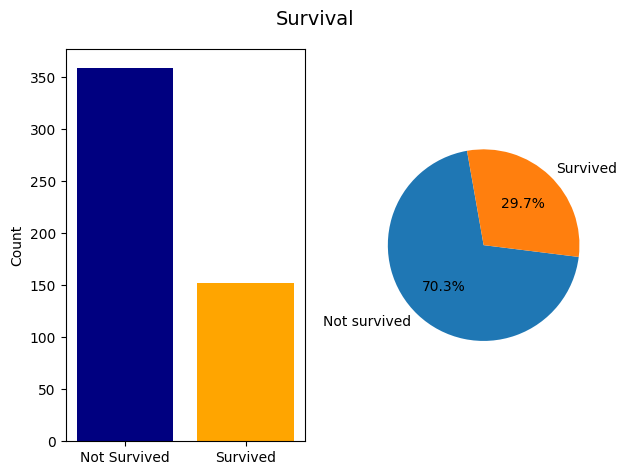

In [194]:
# 1.Plot column "survived" values as pie chart and bar plot.
no_nan_surv["survived"] = no_nan_surv["survived"].replace(
    {0.0: "Not survived", 1.0: "Survived"}
)

survived = no_nan_surv["survived"].value_counts()

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_ylabel("Count")
colors = ["navy", "orange"]
ax1.bar(
    survived.index,
    survived.values,
    tick_label=["Not Survived", "Survived"],
    color=colors,
)

ax2.pie(survived, labels=survived.index, autopct="%1.1f%%", startangle=100)
fig.suptitle("Survival", fontsize=14)
fig.tight_layout()

Text(0.5, 1.0, 'Type of Sex')

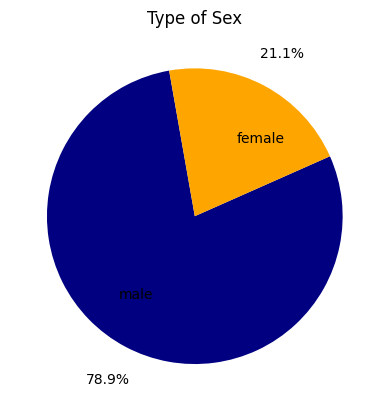

In [195]:
# 2.Plot "sex" column values.
sex = no_nan_surv["sex"].value_counts()
colors = ["navy", "orange"]
plt.pie(
    sex,
    labels=sex.index,
    autopct="%1.1f%%",
    startangle=100,
    colors=colors,
    pctdistance=1.25,
    labeldistance=0.6,
)
plt.title("Type of Sex")

Text(0.5, 1.0, 'Survival Count by Sex')

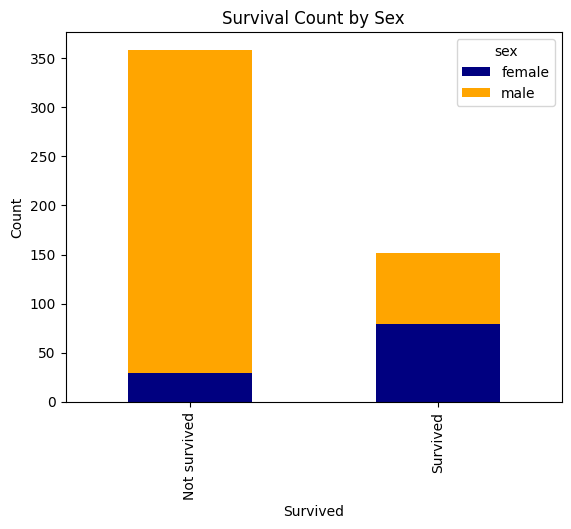

In [196]:
# 3.Split "survived" values by "sex". Plot survived values split by sex.
survived_sex = no_nan_surv.groupby(["survived", "sex"])["sex"].count().unstack()
colors = ["navy", "orange"]
survived_sex.plot(kind="bar", linewidth=1.5, color=colors, stacked=True)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by Sex")

In [197]:
# 4.create corsstab using columns "survived" and "pclass".
crosstabas = pd.crosstab(no_nan_surv["survived"], no_nan_surv["pclass"])
crosstabas

pclass,1,2,3
survived,,,
Not survived,55,78,226
Survived,63,38,51


Text(0.5, 1.0, 'Survival Count by pclass')

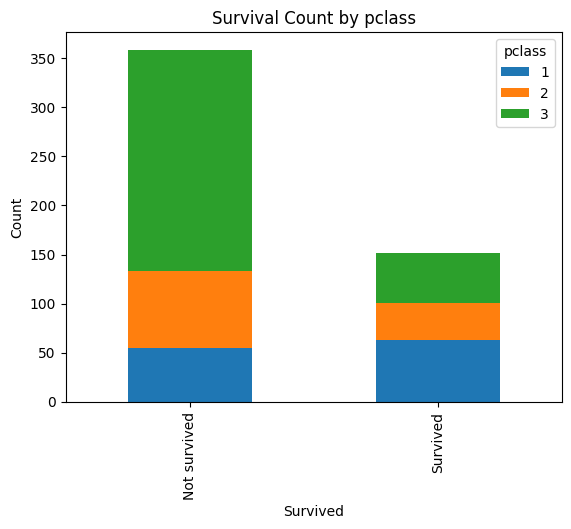

In [198]:
# 5.Split "survived" values by "pclass". Plot survived values split by pclass.
crosstabas.plot(kind="bar", stacked=True)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by pclass")

In [199]:
# 6.create crosstab using columns "survived" and keys "pclass" and "sex".
pd.crosstab(
    no_nan_surv["survived"], columns=[no_nan_surv["sex"], no_nan_surv["pclass"]]
)

sex          female         male         
pclass            1   2   3    1   2    3
survived                                 
Not survived      1   3  25   54  75  201
Survived         30  32  17   33   6   34

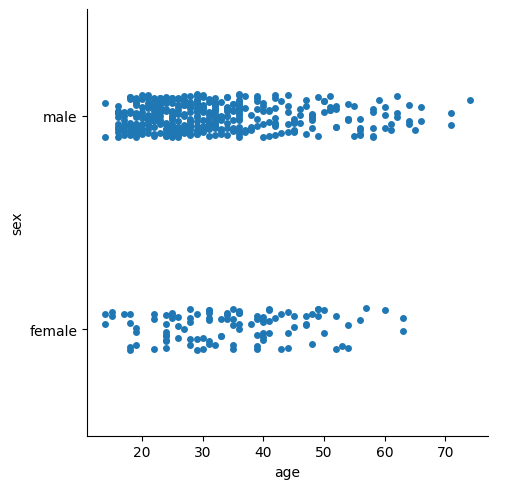

In [200]:
# 7.Draw factorplot using seaboarn. sns.factorplot.
# sns.factorplot(x ="survived", y ="sex", data = no_nan_surv) neveikia, panaikintas nuo 0.9.0 versijos.
sns.catplot(x="age", y="sex", data=no_nan_surv)

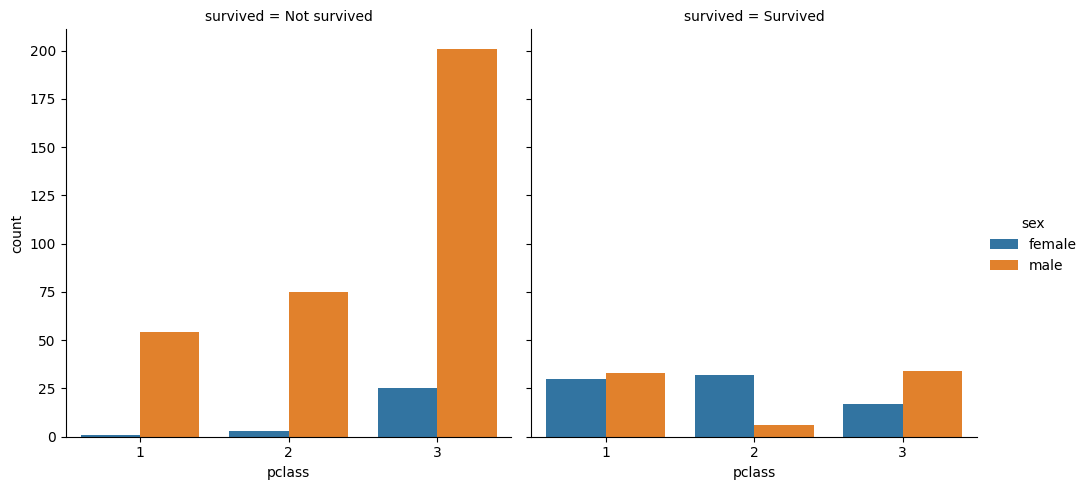

In [201]:
sns.catplot(x="pclass", hue="sex", col="survived", data=no_nan_surv, kind="count")

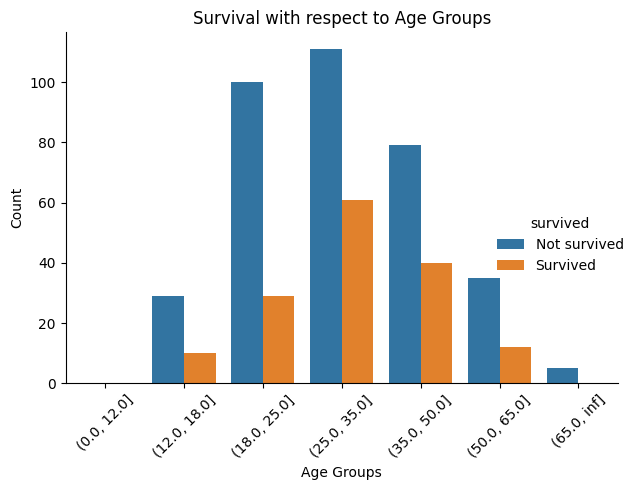

In [202]:
# 8.draw survived plot with respect to "age_groups".
sns.catplot(x="age_groups", hue="survived", kind="count", data=no_nan_surv)
plt.title("Survival with respect to Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

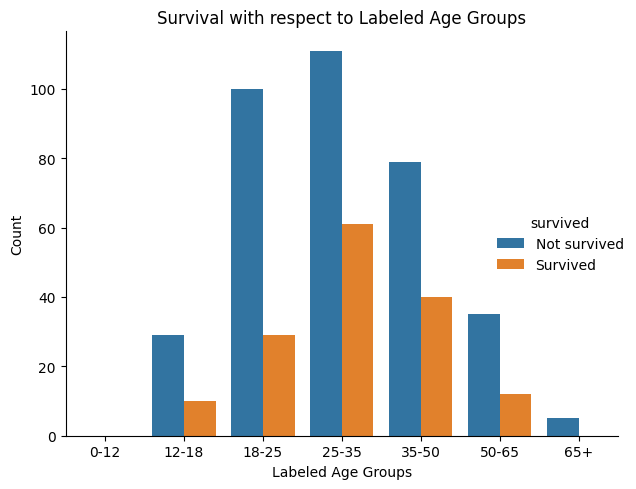

In [203]:
# 9.draw survived plot with respect to "labeled_age_groups".
sns.catplot(x="labeled_age_groups", hue="survived", kind="count", data=no_nan_surv)
plt.title("Survival with respect to Labeled Age Groups")
plt.xlabel("Labeled Age Groups")
plt.ylabel("Count")
plt.tight_layout()

([0, 1, 2, 3],
 [Text(0, 0, '(-0.001, 8.05]'),
  Text(1, 0, '(8.05, 14.454]'),
  Text(2, 0, '(14.454, 31.275]'),
  Text(3, 0, '(31.275, 512.329]')])

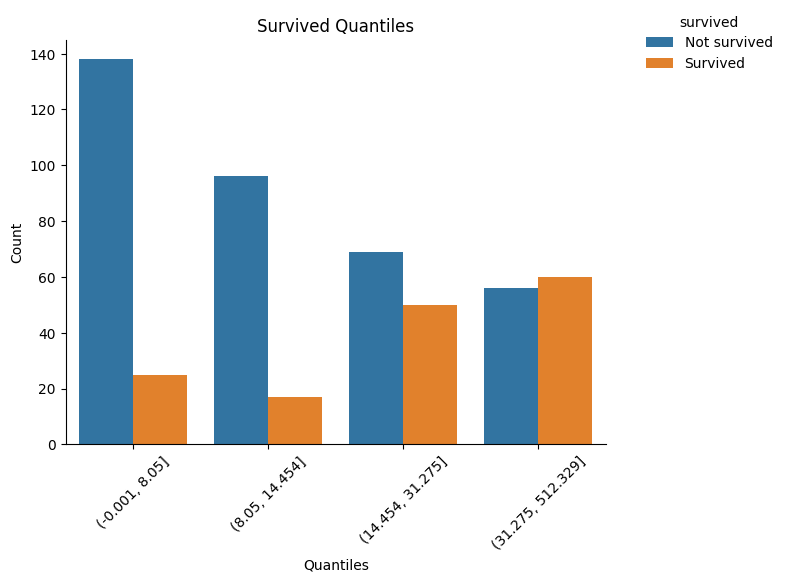

In [204]:
# 10.draw survived plot with respect to "fare_quantiles".
ax = sns.catplot(x="fare_quantiles", hue="survived", kind="count", data=no_nan_surv)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Survived Quantiles")
plt.xlabel("Quantiles")
plt.ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=45)

### Investigate groups
1. Find top 5 most common names splitted by class. 
1. Find top 5 most common names splitted by class and sex. 
1. Find top 5 most common names splitted by class and age groups. 
2. Count passengers traveling home or emigrating. 
2. Count passengers by continents. 
2. Count passengers by countries. 
2. Count passengers by cities. 
3. plot survived column by countries. 
3. plot survived column by continents. 
3. what is the distribution of classes with respect to destination country/town? 
3. what is the distribution of classes with respect to embarked pord? 

In [205]:
# 1.Find top 5 most common names splitted by class.
topnames5 = pd.DataFrame(no_nan_surv.groupby(["class", "first_name"]).size())
topnames5.columns = ["count"]
topnames5.sort_values(by=["count"], ascending=False).head(5)

,,count
class,first_name,
3.0,Ivan,5
2.0,William John,4
1.0,Edward Austin,3
2.0,Edwy Arthur,3
3.0,Rossmore Edward,3


In [206]:
# 2.Find top 5 most common names splitted by class and sex.
top_names5 = pd.DataFrame(no_nan_surv.groupby(["class", "first_name", "sex"]).size())
top_names5.columns = ["count"]
top_names5.sort_values(by=["count"], ascending=False).head(5)

,,,count
class,first_name,sex,
3.0,Ivan,male,5
2.0,William John,male,4
1.0,Edward Austin,male,3
2.0,Edwy Arthur,male,3
3.0,Rossmore Edward,male,3


In [207]:
# 3.Find top 5 most common names splitted by class and age groups.
top5_names = pd.DataFrame(
    no_nan_surv.groupby(["class", "age_groups", "first_name"]).size()
)
top5_names.columns = ["count"]
top5_names.sort_values(by=["count"], ascending=False).head(5)

C:\Users\juuus\AppData\Local\Temp\ipykernel_21140\4025652085.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_nan_surv.groupby(["class", "age_groups", "first_name"]).size()


count
class age_groups   first_name                               
2.0   (18.0, 25.0] Alfred "Alf"                            3
3.0   (35.0, 50.0] Johan (Johanna Persdotter Larsson)      3
2.0   (18.0, 25.0] William John                            3
                   Frederick William                       3
1.0   (50.0, 65.0] James Clinch                            3

In [208]:
# 4.Count passengers traveling home or emigrating.
no_nan_surv["travel_direction"].value_counts()

travel_direction
False    367
True     144
Name: count, dtype: int64

In [209]:
# 5.Count passengers by continents.
def continent(value):
    if value in ["US", " Canada", "New York City"]:
        return "North America"
    elif value in [" South Africa", " Egypt"]:
        return "Africa"
    elif value in [" Peru", " Argentina"]:
        return "South America"
    elif value in [" Australia"]:
        return " Australia"
    elif value in [" Lebanon", " China", " Syria"]:
        return " Asia"
    else:
        return "Europe"


no_nan_surv["home_country"] = no_nan_surv["home_country"].map(lambda x: x.split("[")[0])
countries = no_nan_surv["home_country"].unique()
no_nan_surv["continents"] = no_nan_surv["home_country"].apply(continent)
no_nan_surv["continents"].value_counts()

continents
Europe           460
North America     23
 Asia             18
South America      5
Africa             4
 Australia         1
Name: count, dtype: int64

In [210]:
# import pycountry_convert as pc
# ideja

ModuleNotFoundError: No module named 'pycountry_convert'

In [211]:
# 6.Count passengers by countries.
no_nan_surv["home_country"].value_counts()

home_country
 US                        124
 England                    98
 Sweden                     53
 Finland                    31
 UK                         23
 Canada                     21
 Croatia                    21
 Bulgaria                   17
 Norway                     17
 Lebanon                    13
 France                     12
 Belgium                    11
 Ireland                     8
 Switzerland                 7
 Denmark                     6
 Bosnia                      5
 Channel Islands             4
 Argentina                   4
 China                       4
Russia                       3
 Germany                     2
 Ottoman Empire              2
 Egypt                       2
 Scotland                    2
 Poland                      2
 Wales                       2
New York City                2
 Russian Empire              2
 South Africa                2
 Italy                       2
 Peru                        1
 Portugal                 

In [212]:
# 7.Count passengers by cities.
no_nan_surv["home_town"].value_counts()

home_town
New York       32
London         21
Paris          12
Unknown        11
Montreal       10
               ..
Široka Kula     1
Birmingham      1
Hrastelnica     1
Porthallow      1
Avaldsnes       1
Name: count, Length: 235, dtype: int64

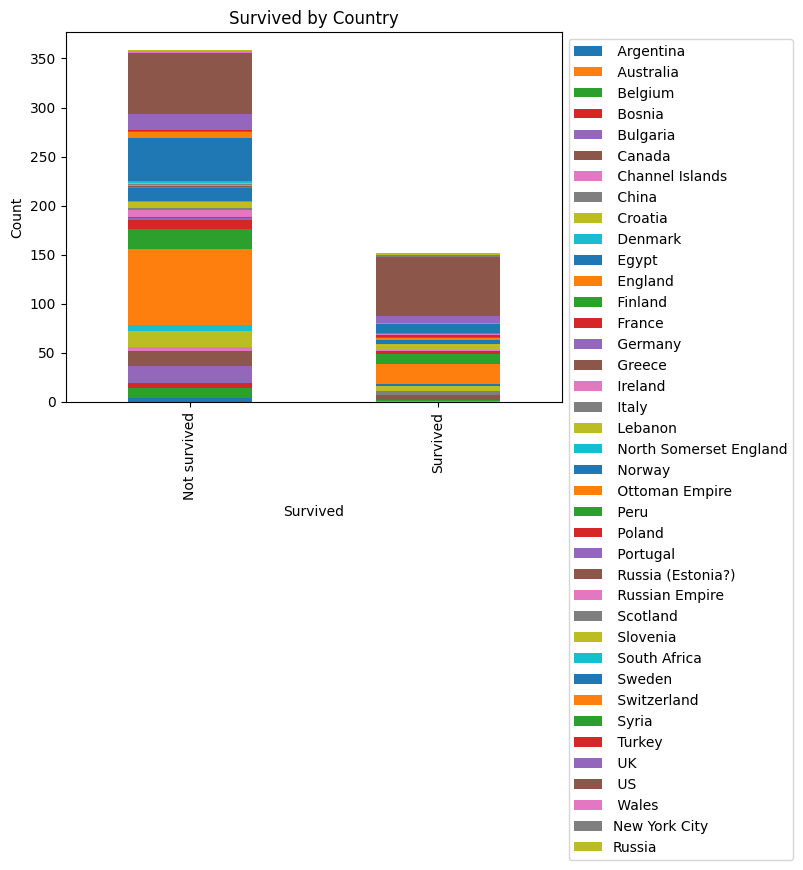

In [213]:
# 8.plot survived column by countries.
survived_by_country = (
    no_nan_surv.groupby(["survived", "home_country"])["home_country"].count().unstack()
)

survived_by_country
survived_by_country.plot(kind="bar", stacked=True)
plt.title("Survived by Country")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

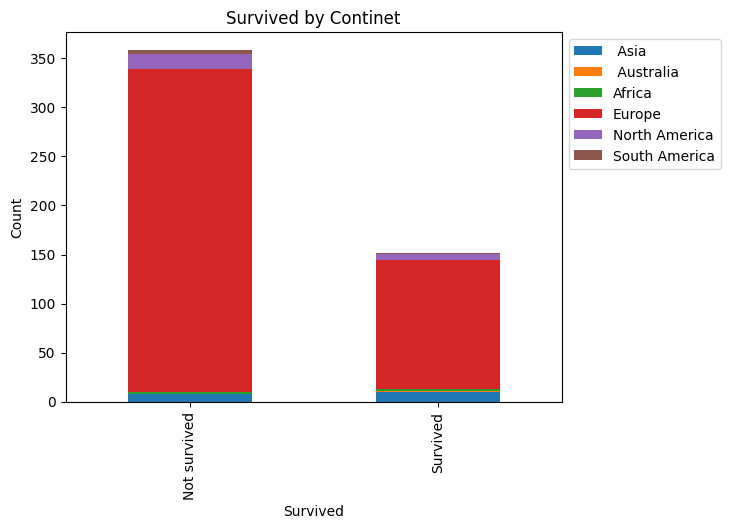

In [214]:
# 9. plot survived column by continents.
survived_by_continent = (
    no_nan_surv.groupby(["survived", "continents"])["continents"].count().unstack()
)
survived_by_continent.plot(kind="bar", stacked=True)
plt.title("Survived by Continet")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Distribution of classes with respect to destination country')

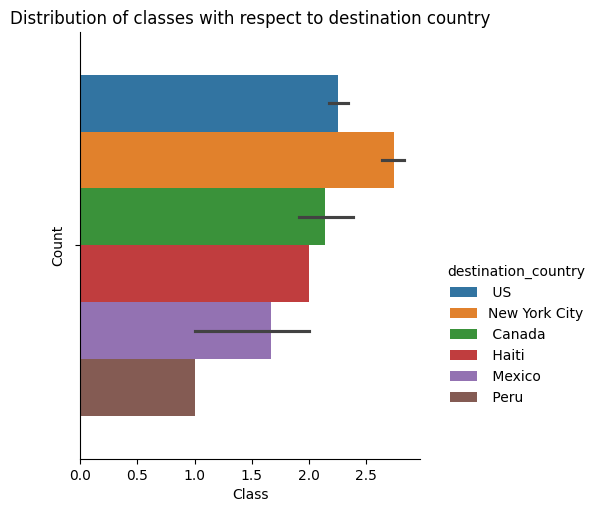

In [215]:
# 10.what is the distribution of classes with respect to destination country/town?
ax1 = sns.catplot(
    x="class",
    hue="destination_country",
    data=no_nan_surv,
    kind="bar",
    height=5,
    aspect=0.5,
)
sns.move_legend(ax1, "lower left", bbox_to_anchor=(1, 0.2))
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.title("Distribution of classes with respect to destination country")

Text(0.5, 1.0, 'Distribution of classes with respect to embarked pord')

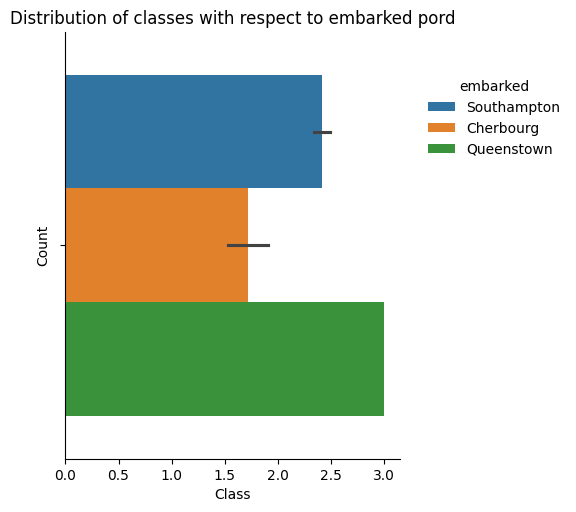

In [216]:
# 11.what is the distribution of classes with respect to embarked pord?
ax2 = sns.catplot(
    x="class",
    hue="embarked",
    data=no_nan_surv,
    kind="bar",
    height=5,
    aspect=0.5,
)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 0.9))
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.title("Distribution of classes with respect to embarked pord")